In [77]:
import os

if os.path.isdir("../notebooks/"):
    os.chdir("..")

In [78]:
import json
import random
import itertools
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim.models as gm
from tqdm import tqdm
from gensim.models import KeyedVectors
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


from badseeds import replicate_fig2
from badseeds import utils, seedbank, metrics, replicate_bolukbasi, replicate_fig4


In [79]:
# path to config json file containing paths to datasets. change if necessary
CONFIG_PATH = "./config.json"

In [80]:
with open(CONFIG_PATH, "r") as f:
    config = json.load(f)

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.rcParams["font.family"] = "serif"

In [82]:
# for replicability
np.random.seed(42)
random.seed(42)

In [83]:
# # mock data
# from urllib.request import Request, urlopen
# import random

# url = "https://svnweb.freebsd.org/csrg/share/dict/words?revision=61569&view=co"
# req = Request(url, headers={"User-Agent": "Mozilla/5.0"})

# web_byte = urlopen(req).read()

# webpage = web_byte.decode("utf-8")
# random_30_words = random.choices(webpage.split("\n"), k=30)

In [84]:
# gender_pairs_words = random_30_words[:10]
# gender_pairs_values = np.sort(np.random.randn(10))

# random_pairs_words = random_30_words[10:20]
# random_pairs_values = np.sort(np.random.randn(10))

# shuffled_gender_pairs_words = random_30_words[20:]
# shuffled_gender_pairs_values = np.sort(np.random.randn(10))
# # print(gender_pairs_words)

## Models and Data

### Models

In [85]:
models = []
# load google news word2vec
# Load vectors directly from the file
# models.append(
#     KeyedVectors.load_word2vec_format(
#         os.path.join(
#             config["models"]["dir_path"], config["models"]["google_news_subpath"]
#         )
#         + ".bin",
#         binary=True,
#     )
# )

# replicate fig. 3 with NYT dataset
# get embeddings trained on NYT with min freq of 100

direct = os.fsencode(
    os.path.join(
        config["models"]["dir_path"], config["models"]["nyt_subpath"]["100"]
    )
)

for filename in os.listdir(direct):
    f = os.path.join(direct, filename)

    # checking if it is a file
    if os.path.isfile(f):
        f = os.fsdecode(f)
        models.append(KeyedVectors.load(f))


### Seeds

In [95]:
# get desired seeds:
seed = seedbank.seedbanking(config["seeds"]["dir_path"] + "seeds.json", index="ID")

gender_seed_list = [
    "definitional_female-Bolukbasi_et_al_2016",
    "definitional_male-Bolukbasi_et_al_2016",
]

# lower case seeds? she didnt do it in appendix (doesnt make sense tho)

seed_list = [seed.loc[seed_set]['Seeds'] for seed_set in gender_seed_list]
seed1 = [item.lower() for item in seed_list[0]]
seed2 = [item.lower() for item in seed_list[1]]

# hard coded shuffled seeds from paper
seed1_shuf = [
    "female",
    "she",
    "woman",
    "gal",
    "her",
    "daughter",
    "girl",
    "herself",
    "mother",
    "mary",
]
#misses seed
seed2_shuf = [
    "john",
    "man",
    "son",
    "father",
    "male",
    "himself",
    "guy",
    "he",
    "his",
    "boy",
]

seed2_rnd = [
    "chun",
    "brush",
    "dictates",
    "caesar",
    "fewest",
    "breitbart",
    "rod",
    "heaped",
    "julianna",
    "longest",
]
seed1_rnd = [
    "negatives",
    "vel",
    "theirs",
    "canoe",
    "meet",
    "bilingual",
    "mor",
    "facets",
    "fari",
    "lily",
]

### Function call

In [96]:
(
    variance_ordered,
    variance_rnd,
    variance_inshuffle,
) = replicate_bolukbasi.pca_seeds_model(
    seed1, seed2, models, seed1_shuf = seed1_shuf, seed2_shuf = seed2_shuf,components=True
)



"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"
"Key 'gal' not present"


#### Pairs

In [97]:
collect = collections.Counter(models[0].index_to_key)
s = 0
for model in models[1:]:
    s += len(model.index_to_key)
    collect = (collect & collections.Counter(model.index_to_key))

overlap_list = list((collect).elements())
overlap_embed = utils.get_embeddings(overlap_list, models, query_strat="average")

In [98]:
vals = []
words = []
for var in [variance_ordered,variance_rnd,variance_inshuffle]:
    temp = (np.mean(var, axis=0)[0])
    cos_sim = cosine_similarity(overlap_embed, [temp]).flatten()
    v, w = zip(*sorted(zip(list(cos_sim), overlap_list)))
    vals.append(v[:10]+v[-10:])
    words.append((w[:10]+w[-10:]))
    
gender_pairs_values, gender_pairs_words = np.asarray(vals[0]), words[0]
random_pairs_values, random_pairs_words= np.asarray(vals[1]), words[1]
shuffled_gender_pairs_values, shuffled_gender_pairs_words= np.asarray(vals[2]), words[2]

## Visualization

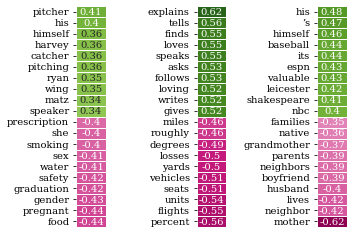

In [99]:
# plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(w=6.50127, h=5)
fig.tight_layout(rect=[0, 0, 0.9, 1], pad=6)

all_values = np.concatenate(
    [gender_pairs_values, random_pairs_values, shuffled_gender_pairs_values]
)
vmin, vmax = np.min(all_values), np.max(all_values)

ax1 = sns.heatmap(
    gender_pairs_values[::-1, np.newaxis],
    yticklabels=gender_pairs_words,
    xticklabels=[],
    cmap=plt.get_cmap("PiYG"),
    ax=ax1,
    cbar=False,
    annot=True,
    center=np.zeros(1),
    linewidths=0.5,
    vmin=vmin,
    vmax=vmax,
)
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize=10)


ax2 = sns.heatmap(
    random_pairs_values[::-1, np.newaxis],
    yticklabels=random_pairs_words,
    xticklabels=[],
    cmap=plt.get_cmap("PiYG"),
    ax=ax2,
    cbar=False,
    annot=True,
    center=0,
    linewidths=0.5,
    vmin=vmin,
    vmax=vmax,
)
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, fontsize=10)

ax3 = sns.heatmap(
    shuffled_gender_pairs_values[::-1, np.newaxis],
    yticklabels=shuffled_gender_pairs_words,
    xticklabels=[],
    cmap=plt.get_cmap("PiYG"),
    ax=ax3,
    cbar=False,
    annot=True,
    center=0,
    linewidths=0.5,
    vmin=vmin,
    vmax=vmax,
)
ax3.set_yticklabels(ax3.get_yticklabels(), rotation=0, fontsize=10)

# f.set_tight_layout(True)
plt.show()

In [100]:
# save to latex
plt.rc("pgf", texsystem="pdflatex")
# fig.savefig("images/fig_4.pgf", bbox_inches="tight")
fig.savefig("images/fig_4.png", bbox_inches='tight')

In [101]:

gender_pairs_words = [
    "herself",
    "ms",
    "her",
    "she",
    "pregnant",
    "pitching",
    "baseball",
    "syndergraad",
    "himself",
    "his",
    "him",
    "he",
]

random_pairs_words = [
    "likelihood",
    "eurozone",
    "incentive",
    "downturn",
    "setback",
    "photographed",
    "tales" "hood",
    "gracia",
    "danced",
]

shuffled_gender_pairs_words = [
    "outcomes",
    "son",
    "father",
    "mother",
    "aunt",
    "potentially",
    "male",
    "hood",
    "garcia",
    "md",
]

embed_a = utils.get_embeddings(gender_pairs_words, models, query_strat="average")
embed_b = utils.get_embeddings(random_pairs_words, models, query_strat="average")
embed_c = utils.get_embeddings(shuffled_gender_pairs_words, models, query_strat="average")



similarity = replicate_fig4.figure_4(
    variance_ordered, variance_rnd, variance_inshuffle, [embed_a, embed_a, embed_a]
)

gender_pairs_values, gender_pairs_words = zip(*sorted(zip(similarity[0], gender_pairs_words)))
random_pairs_values, random_pairs_words = zip(*sorted(zip(similarity[1], random_pairs_words)))
shuffled_gender_pairs_values, shuffled_gender_pairs_words = zip(*sorted(zip(similarity[2], shuffled_gender_pairs_words)))


gender_pairs_values = np.asarray(gender_pairs_values)
random_pairs_values = np.asarray(random_pairs_values)
shuffled_gender_pairs_values = np.asarray(shuffled_gender_pairs_values)

In [102]:
print(gender_pairs_values, "\n",gender_pairs_words, "\n")
print(random_pairs_values, "\n", random_pairs_words, "\n")
print(shuffled_gender_pairs_values, "\n", shuffled_gender_pairs_words, "\n")

[-0.22850468 -0.19185863 -0.15298991 -0.14335096 -0.07982428 -0.05902333
 -0.05224193 -0.04310155 -0.02704917 -0.00495513  0.00565813] 
 ('his', 'pitching', 'him', 'syndergraad', 'himself', 'pregnant', 'she', 'baseball', 'her', 'herself', 'ms') 

[-0.26374879 -0.25778701 -0.19771353 -0.1576484  -0.15189446 -0.12394891
  0.03083902  0.04770677  0.06305226] 
 ('gracia', 'likelihood', 'eurozone', 'downturn', 'incentive', 'danced', 'taleshood', 'photographed', 'setback') 

[-0.19391877 -0.16739856 -0.08923404 -0.08615757 -0.03160643 -0.02885831
  0.02830447  0.08861143  0.12794132  0.18725777] 
 ('mother', 'aunt', 'outcomes', 'son', 'md', 'father', 'potentially', 'hood', 'male', 'garcia') 

